# Import Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [4]:
df=pd.read_csv("Suicides in India 2001-2012.csv")

In [5]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [6]:
df.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [7]:
df.dtypes

State        object
Year          int64
Type_code    object
Type         object
Gender       object
Age_group    object
Total         int64
dtype: object

In [8]:
# describe all the columns in "df" 
df.describe(include = "all")

,State,Year,Type_code,Type,Gender,Age_group,Total
count,237519,237519.000000,237519,237519,237519,237519,237519.000000
unique,38,NaN,5,69,2,6,NaN
top,Maharashtra,NaN,Causes,Others (Please Specify),Male,15-29,NaN
freq,6792,NaN,109200,7263,118879,45223,NaN
mean,NaN,2006.500448,NaN,NaN,NaN,NaN,55.034477
std,NaN,3.452240,NaN,NaN,NaN,NaN,792.749038
min,NaN,2001.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,2004.000000,NaN,NaN,NaN,NaN,0.000000
50%,NaN,2007.000000,NaN,NaN,NaN,NaN,0.000000
75%,NaN,2010.000000,NaN,NaN,NaN,NaN,6.000000


In [9]:
df.info

<bound method DataFrame.info of                 State  Year      Type_code  \
0       A & N Islands  2001         Causes   
1       A & N Islands  2001         Causes   
2       A & N Islands  2001         Causes   
3       A & N Islands  2001         Causes   
4       A & N Islands  2001         Causes   
...               ...   ...            ...   
237514    West Bengal  2012  Social_Status   
237515    West Bengal  2012  Social_Status   
237516    West Bengal  2012  Social_Status   
237517    West Bengal  2012  Social_Status   
237518    West Bengal  2012  Social_Status   

                                           Type  Gender Age_group  Total  
0                            Illness (Aids/STD)  Female      0-14      0  
1       Bankruptcy or Sudden change in Economic  Female      0-14      0  
2       Cancellation/Non-Settlement of Marriage  Female      0-14      0  
3             Physical Abuse (Rape/Incest Etc.)  Female      0-14      0  
4                                 Dowry 

In [10]:
df.duplicated().any()

False

In [11]:
df.sample(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
41820,Chhattisgarh,2003,Causes,Love Affairs,Male,45-59,1
174205,Odisha,2010,Causes,Death of Dear Person,Male,60+,0
122570,Lakshadweep,2002,Means_adopted,By Consuming Other Poison,Female,0-14,0
193762,Rajasthan,2009,Causes,Poverty,Male,15-29,5
213300,Tripura,2006,Causes,Paralysis,Female,15-29,0
231940,West Bengal,2003,Causes,Unemployment,Female,15-29,6
59934,Daman & Diu,2011,Means_adopted,By Drowning,Female,30-44,0
149957,Meghalaya,2003,Causes,Paralysis,Male,30-44,0
54414,Daman & Diu,2001,Means_adopted,By coming under running vehicles/trains,Female,60+,0
187515,Punjab,2010,Causes,Divorce,Male,0-14,0


In [12]:
df.Type_code.value_counts()

Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          7296
Social_Status             4560
Name: Type_code, dtype: int64

In [13]:
df.Age_group.value_counts()

15-29     45223
30-44     45193
45-59     45146
60+       45074
0-14      45027
0-100+    11856
Name: Age_group, dtype: int64

In [14]:
len(df[df['Total'] == 0])

135481

In [15]:
df.Type.value_counts()

Others (Please Specify)                           7263
By Drowning                                       4200
Family Problems                                   4200
By Hanging                                        4200
Cancer                                            4200
                                                  ... 
Diploma                                            912
Primary                                            912
By Other means                                     350
Bankruptcy or Sudden change in Economic Status     350
Not having Children (Barrenness/Impotency          350
Name: Type, Length: 69, dtype: int64

# Data Wrangling

In [16]:
# rename states

df.replace('A & N Islands (Ut)', 'A & N Islands', inplace=True)
df.replace('Chandigarh (Ut)', 'Chandigarh', inplace=True)
df.replace('D & N Haveli (Ut)', 'D & N Haveli', inplace=True)
df.replace('Daman & Diu (Ut)', 'Daman & Diu', inplace=True)
df.replace('Lakshadweep (Ut)', 'Lakshadweep', inplace=True)
df.replace('Delhi (Ut)', 'Delhi', inplace=True)

In [17]:
df.replace('Bankruptcy or Sudden change in Economic', 
           'Bankruptcy or Sudden change in Economic Status', inplace=True)
df.replace('By Other means (please specify)', 'By Other means', inplace=True)
df.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency', inplace=True)

In [18]:
# Drop rows where total is zero.

df = df.drop(df[df.Total==0].index)

In [19]:
df

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [20]:
df[df['Total']==0]

,State,Year,Type_code,Type,Gender,Age_group,Total


In [21]:
df = df.drop(df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') | 
               (df.State == 'Total (States)')].index)

# EDA

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='pie')` instead of `Series.plot('pie',)`.
  


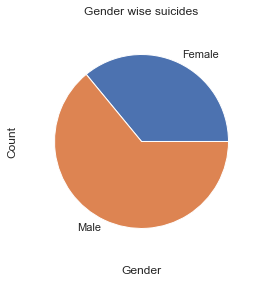

In [22]:
#Gender Suicide Frequency
gender = df.groupby('Gender').sum()['Total'].plot("pie", figsize=(5,4), title ="Gender wise suicides\n");
gender.set_xlabel('\nGender')
gender.set_ylabel('Count\n')
sns.set_style('whitegrid')
sns.cubehelix_palette(8);


/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


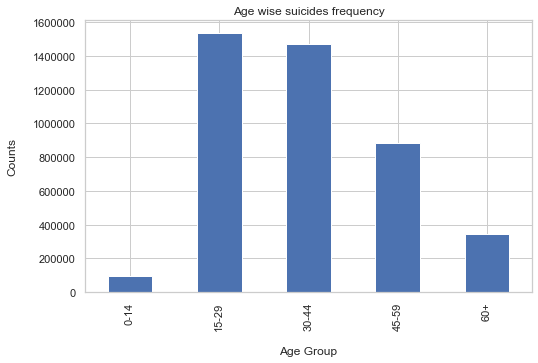

In [51]:
# Age Suicide Frequency
df_Age = df[df['Age_group']!='0-100+']

age = df_Age.groupby('Age_group').sum()['Total'].plot("bar",figsize=(8,5), title ="Age wise suicides frequency");
age.set_xlabel('\nAge Group')
age.set_ylabel('Counts\n')
sns.set_style('whitegrid')
sns.set_palette('Set2');

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='line')` instead of `Series.plot('line',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


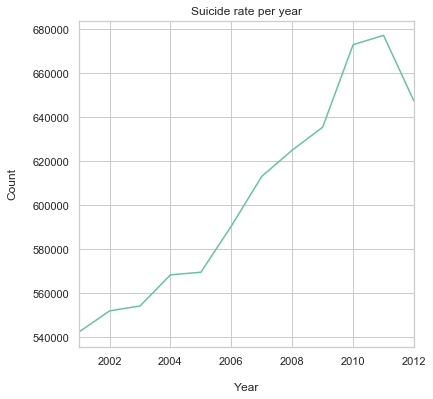

In [52]:
# Suicide rate every year

year = df.groupby('Year').sum()['Total'].plot('line', figsize=(6,6), title = 'Suicide rate per year');
year.set_xlabel('\nYear')
year.set_ylabel('Count\n')
sns.set_style('whitegrid');

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """


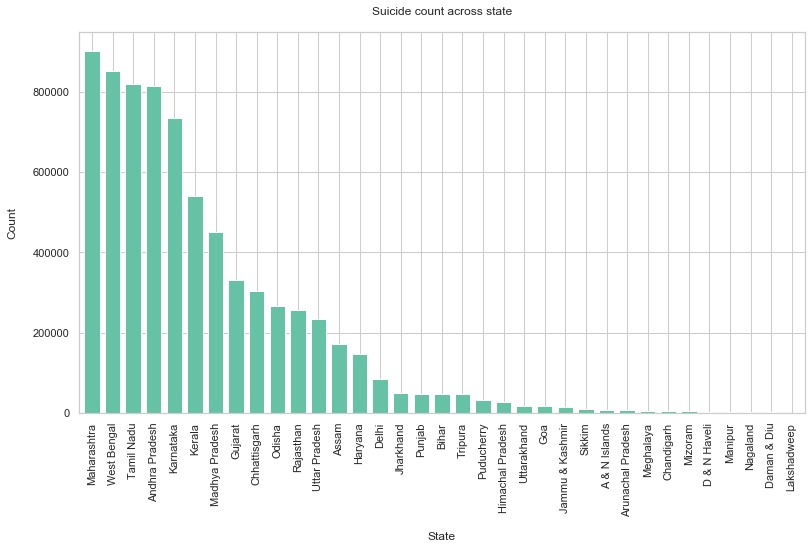

In [53]:
# State wise Suicide count

state = df.groupby('State').sum()['Total']
sort_state = state.sort_values(ascending = False)
state_fig = sort_state.plot('bar', figsize = (13,7), title = 'Suicide count across state\n', width = 0.75)
state_fig.set_xlabel('\nState')
state_fig.set_ylabel('Count\n')
sns.set_style('whitegrid')
sns.set_palette('Set2');

In [55]:
# split df ny it's type code

cause = df[df['Type_code'] == 'Causes']
edu_status = df[df['Type_code'] == 'Education_Status']
means_adpt = df[df['Type_code'] == 'Means_adopted']
prof = df[df['Type_code'] == 'Professional_Profile']
soc_status = df[df['Type_code'] == 'Social_Status']



In [56]:
# function to plot

def plot_type(df, Title, X_lab):
    p_type = df.groupby('Type').sum()['Total']
    sort_df = p_type.sort_values(ascending = False)

    fig = sort_df.plot('bar', figsize = (10,6), title = Title + '\n', width = 0.75)
    fig.set_xlabel('\n' + X_lab )
    fig.set_ylabel('Count\n')
    sns.set_style('whitegrid')
    sns.set_palette('Set2');

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  import sys


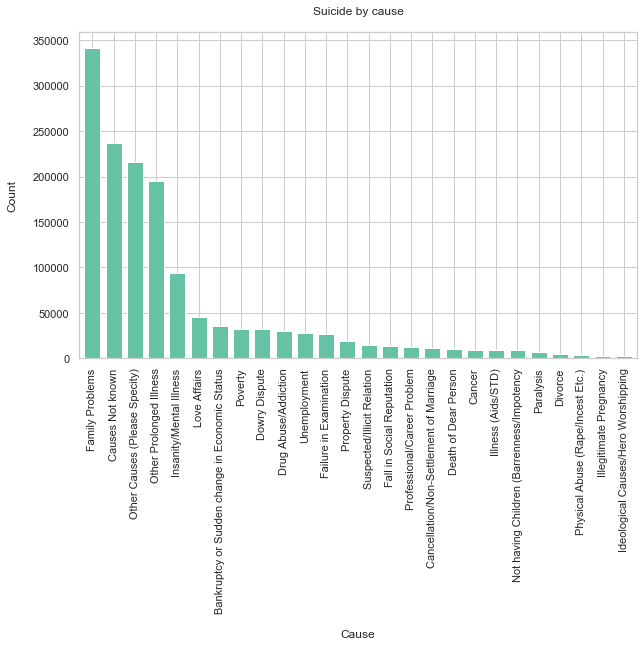

In [57]:
# plot by cause
plot_type(cause, 'Suicide by cause', 'Cause')

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  import sys


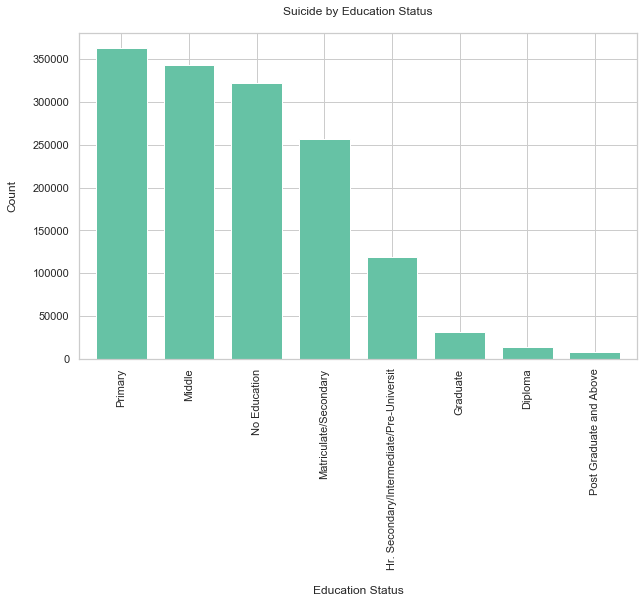

In [58]:
# plot by education status
plot_type(edu_status, 'Suicide by Education Status', 'Education Status')

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  import sys


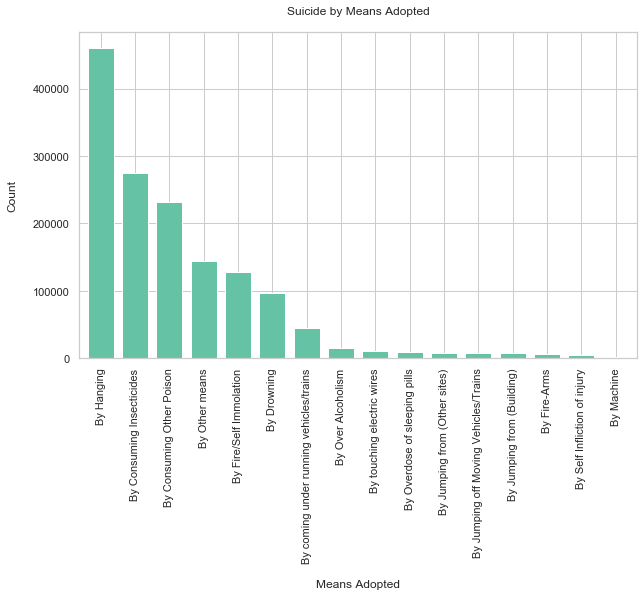

In [59]:
# plot by means adopted
plot_type(means_adpt, 'Suicide by Means Adopted', 'Means Adopted')


/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  import sys


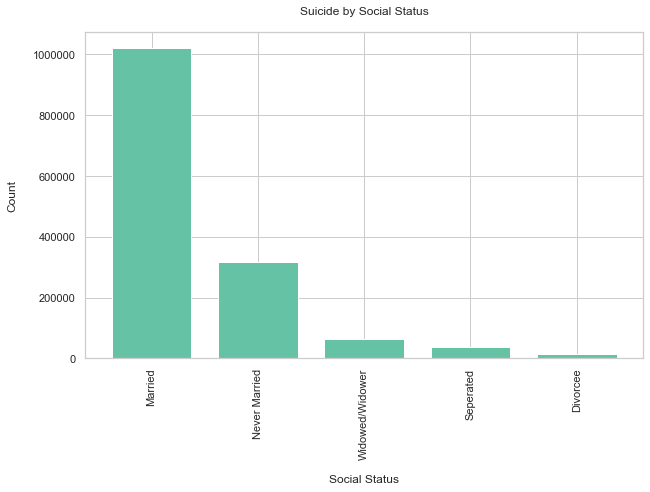

In [60]:
# suicide by social Status
plot_type(soc_status, 'Suicide by Social Status', 'Social Status',)


/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  import sys


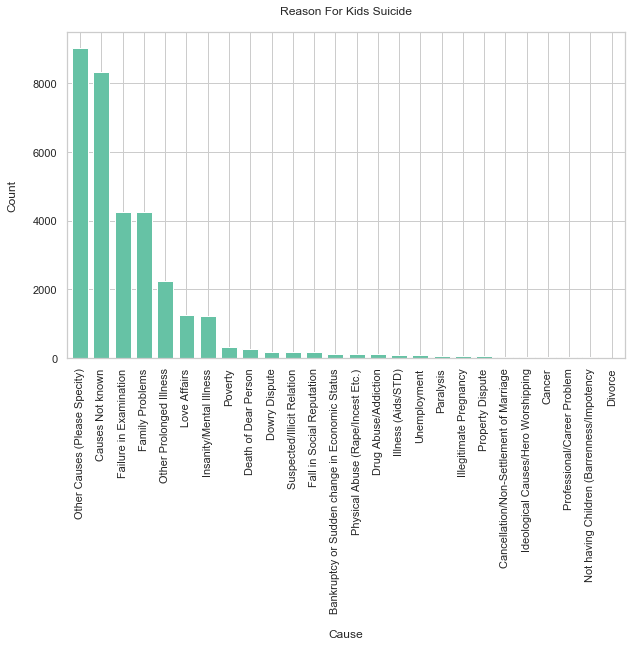

In [61]:
age_lower = df[df['Age_group']== '0-14']
age_lower_cause = age_lower[age_lower['Type_code'] == 'Causes']
plot_type(age_lower_cause, 'Reason For Kids Suicide', 'Cause')

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  import sys


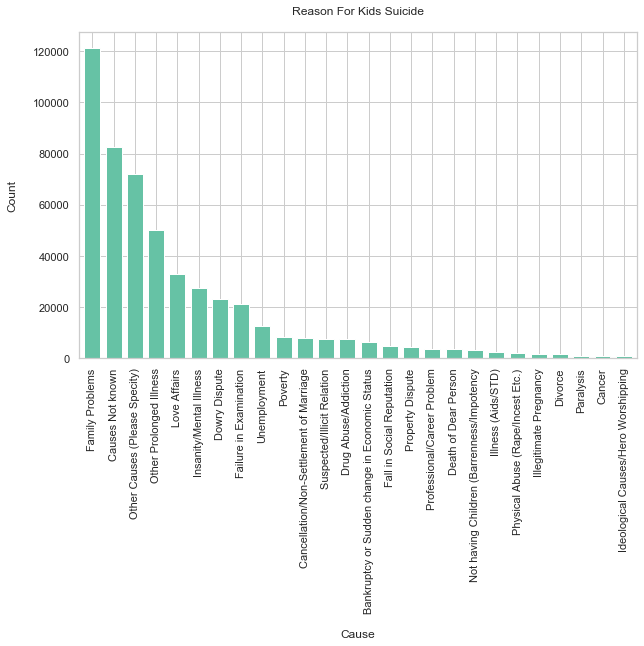

In [62]:
age_middle = df[df['Age_group']== '15-29']
age_middle_cause = age_middle[age_middle['Type_code'] == 'Causes']
plot_type(age_middle_cause, 'Reason For Kids Suicide', 'Cause')


# Conclusion

<p>Conclucion Based on EDA Analysis:
<ul>
    <li>Age group between 15-44 has the highest number of suicides</li>    
    <li>Rate of suicide sky rocketed from 2002-2010 but since 2011 it has been decreasing but, since we have the data till 2012 we cant confim the pattern</li>
    <li>Maharashtra, West Bengal and Tamil Nadu have the highest suicide rate this might also be because of the high population in these states</li>
    <li>Family Problems, Illness, Mental Illness are some of the main reason while most of the reasons are still unknown</li> 
    <li>Hanging, Consuming Insecticides is more common but, most of other means are unknown</li> 
    <li>Most of the professional profile is unknown but house wife comes in second, while Farming comes in at third</li> 
    <li>Married is at the top when it comes to social status while never married is at second</li> 
    <li>The reason for suicide at the age group between 0-14 is because of Failure in Examination</li>  
    <li>The reason for suicide at the age group between 15-29 is because of Family Problems</li>  
</ul>
</p>
    